In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from src import myfunctions
import statsmodels.api as sm
from scipy import signal
import scipy as sp
import warnings

warnings.filterwarnings('ignore')

Data sources:

- Electricity production by source - Our World in Data
https://ourworldindata.org/energy-mix

- CO2 emmissions by country - Our World in Data
https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions

- Solar Photovoltaic potential by country - The World Bank
https://datacatalog.worldbank.org/search/dataset/0038379

In [2]:
# Read data from csv
df_el_prod=pd.read_csv("./input/electricity-prod-source.csv", encoding='ISO-8859-1')
df_co2=pd.read_csv("./input/co2-data.csv", encoding='ISO-8859-1')
df_solar=pd.read_csv("./input/Solar_radiation.csv", encoding='ISO-8859-1')

In [5]:
# Get clean series
df_series=myfunctions.cleanseries(df_el_prod,df_co2)

Text(0.5, 1.0, 'Development of largest poluters (Million Tons per year)')

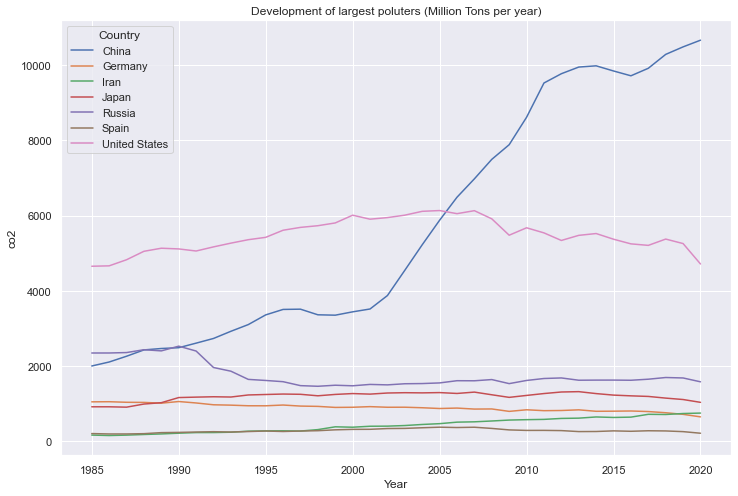

In [39]:
plt.figure(figsize = (12,8))
sns.lineplot(data=df_series[df_series['Country'].isin(['China','United States','Russia','Japan','Iran','Spain','Germany'])],x='Year',y='co2', hue='Country')
plt.title('Development of largest poluters (Million Tons per year)')

Text(0.5, 1.0, 'CO2 polution tons per capita per year')

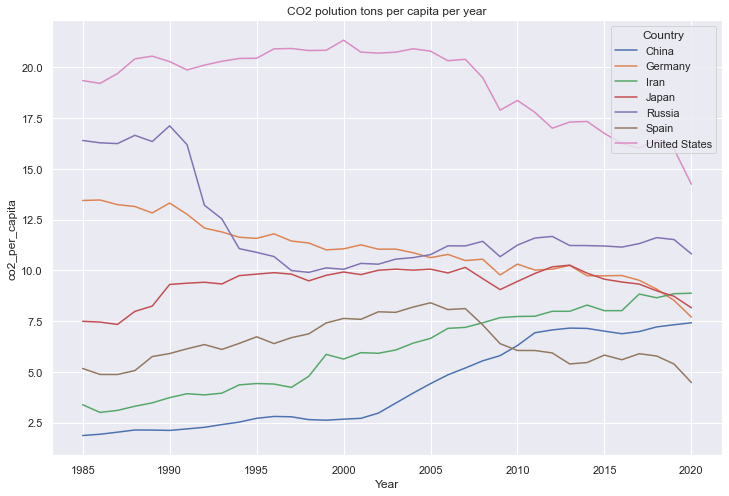

In [38]:
plt.figure(figsize = (12,8))
sns.lineplot(data=df_series[df_series['Country'].isin(['China','United States','Russia','Japan','Iran','Spain','Germany'])],x='Year',y='co2_per_capita', hue='Country')
plt.title('CO2 polution tons per capita per year')

In [50]:
country=input('Please select a country to plot: ')

Please select a country to plot: China


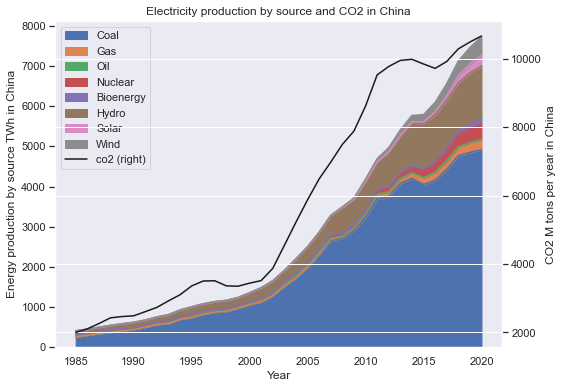

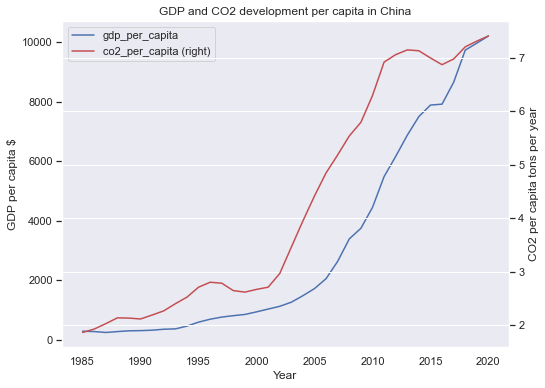

In [51]:
columns=['Coal','Gas','Oil','Nuclear','Bioenergy','Hydro','Solar','Wind']
ax=df_series.loc[df_series['Country']==country].plot(x='Year', y=columns, kind='area', stacked=True, figsize=(8,6))
ax.set_ylabel(f'Energy production by source TWh in {country}')
ax2=df_series.loc[df_series['Country']==country].plot(x='Year', y='co2' ,kind='line', color='k', secondary_y=True, figsize=(8,6), ax=ax)
ax2.set_ylabel(f'CO2 M tons per year in {country}')
plt.title(f'Electricity production by source and CO2 in {country}')
plt.show()

ax=df_series.loc[df_series['Country']==country].plot(x='Year', y='gdp_per_capita', kind='line', figsize=(8,6))
ax.set_ylabel('GDP per capita $')
ax2=df_series.loc[df_series['Country']==country].plot(x='Year', y='co2_per_capita' ,kind='line', color='r', secondary_y=True, figsize=(8,6), ax=ax)
ax2.set_ylabel('CO2 per capita tons per year')
plt.title(f'GDP and CO2 development per capita in {country}')
plt.show()

In [4]:
df_poluters=myfunctions.getstatic(df_series,df_solar,2019)



Text(0.5, 1.0, 'Monetary potential in $ from one square meter per year per country')

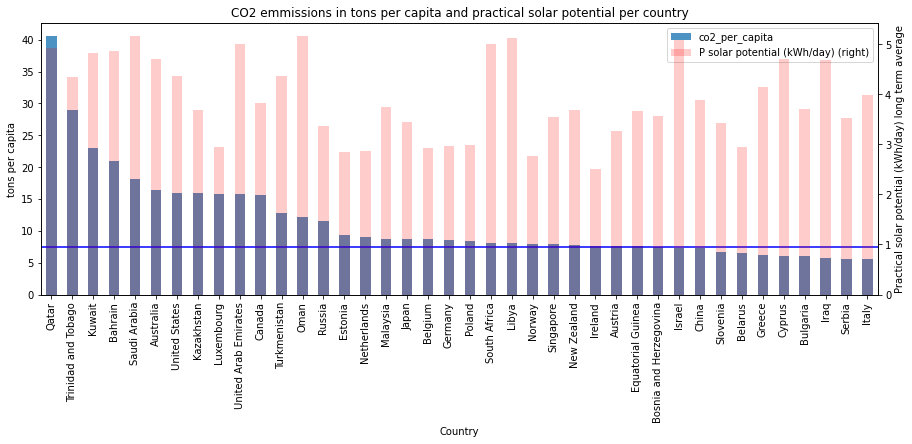

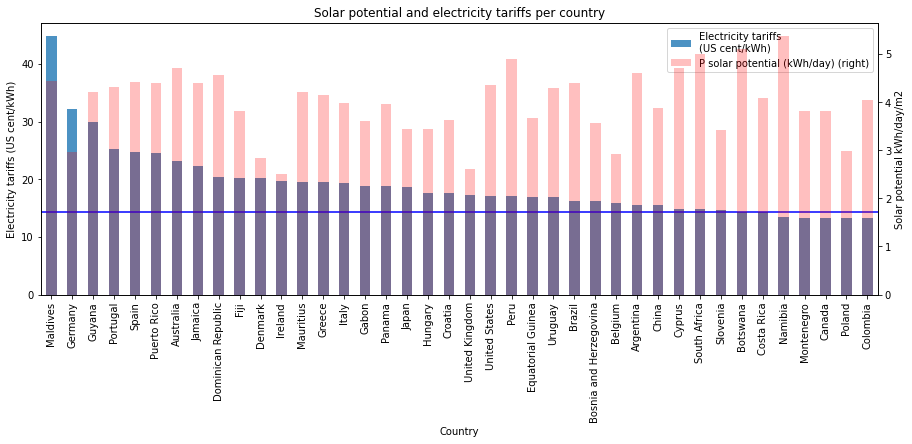

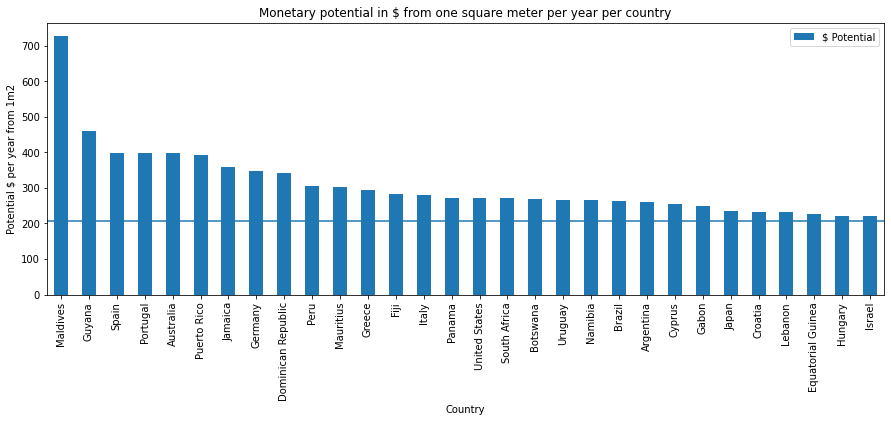

In [42]:
df_poluters.sort_values('co2_per_capita',ascending=False, inplace=True)
ax=df_poluters[:40].plot(x='Country', y='co2_per_capita', kind='bar', figsize=(15,5), alpha=0.8)
ax.set_ylabel('tons per capita')
ax2=df_poluters[:40].plot(x='Country', y='P solar potential (kWh/day)', kind='bar', alpha=0.2, color='r', secondary_y=True, figsize=(15,5), ax=ax)
ax2.set_ylabel('Practical solar potential (kWh/day) long term average')
ax.axhline(df_poluters['co2_per_capita'].mean(), color='b')
plt.title('CO2 emmissions in tons per capita and practical solar potential per country')


df_poluters.sort_values('Electricity tariffs\n(US cent/kWh)',ascending=False, inplace=True)
ax=df_poluters[:40].plot(x='Country', y='Electricity tariffs\n(US cent/kWh)', kind='bar', alpha=0.8, figsize=(15,5))
ax.set_ylabel('Electricity tariffs (US cent/kWh)')
ax2=df_poluters[:40].plot(x='Country', y='P solar potential (kWh/day)', kind='bar', color='r',secondary_y=True, figsize=(15,5), alpha=0.25,ax=ax)
ax2.set_ylabel('Solar potential kWh/day/m2')
ax.axhline(df_poluters['Electricity tariffs\n(US cent/kWh)'].mean(), color='b')
plt.title('Solar potential and electricity tariffs per country')
# ask Fer how to add a third Y axis

df_poluters['$ Potential']=df_poluters['P solar potential (kWh/day)']*df_poluters['Electricity tariffs\n(US cent/kWh)']*365/100
df_poluters.sort_values('$ Potential',ascending=False, inplace=True)
ax=df_poluters[:30].plot(x='Country', y='$ Potential', kind='bar', figsize=(15,5))
ax.set_ylabel('Potential $ per year from 1m2')
ax.axhline(df_poluters['$ Potential'].mean())
plt.title('Monetary potential in $ from one square meter per year per country')


Define target countries which:
- Have high CO2 emissions (>3 tons per capita)
- Have high practical photovoltaic potential (>3kWh / per day / m2)
- Have high costs of electricity (>10 US cents / kWh)
- Have low share of renewables (<30%)

In [ ]:
df_target=df_poluters[(df_poluters['co2_per_capita']>3)&(df_poluters['P solar potential (kWh/day)']>3)&(df_poluters['Electricity tariffs\n(US cent/kWh)']>10)&(df_poluters['Renewable %']<0.3)]
df_target

### Web scraping

Now look in Wikipedia for solar manufacturers that you would contact with this proposition

In [1]:
import requests
from bs4 import BeautifulSoup as BS

In [4]:
url='https://en.wikipedia.org/wiki/List_of_photovoltaics_companies'
res=requests.get(url)
html=res.content
soup=BS(html, "html.parser")
table1=pd.read_html(html)[2]
table2=pd.read_html(html)[3]

In [5]:
table1

Solar modulecompany  \
                                  Solar modulecompany   
0                                         Jinko Solar   
1                                            JA Solar   
2                                         Trina Solar   
3                                         LONGi Solar   
4                                      Canadian Solar   
5                                      Hanwha Q CELLS   
6                                        Risen Energy   
7                                         First Solar   
8                   GCL System Integration Technology   
9   SFCE (Shunfeng International Clean Energy Limi...   
10                                       Yingli Green   
11                                           ReneSola   
12                                     SunPower Corp.   
13  Sources:[7][3][4][5][8][9][6] tenth place depe...   

                                       Shipments (GW)  \
                                                2015*   
0                                          3.79[3][4]   
1                                          3.38[3][4]   
2                                          4.55[3][4]   
3                                                   –   
4                                           3.9[3][4]   
5                                           3.2[3][4]   
6                                                   –   
7                                              2.9[7]   
8                                                 NaN   
9                                                   –   
10                                            2.35[3]   
11                                                  –   
12                                       1.18-1.25[8]   
13  Sources:[7][3][4][5][8][9][6] tenth place depe...   

                                                       \
                                                2015†   
0                                             4.51[5]   
1                                             3.93[5]   
2                                             5.74[5]   
3                                                   –   
4                                              4.7[5]   
5                                              3.3[5]   
6                                          1.24[5][6]   
7                                              2.8[5]   
8                                                 NaN   
9                                             2.28[5]   
10                                       2.35-2.40[5]   
11                                            2.69[5]   
12                                                  –   
13  Sources:[7][3][4][5][8][9][6] tenth place depe...   

                                                       \
                                       2016(Forecast)   
0                                            6-6.5[5]   
1                                          5.2-5.5[5]   
2                                                   –   
3                                                   –   
4                                          5.4-5.5[5]   
5                                          4.5-4.7[5]   
6                                                   –   
7                                            2.9-3[5]   
8                                                 NaN   
9                                                   –   
10                                                  –   
11                                                  –   
12                                           1.7-2[9]   
13  Sources:[7][3][4][5][8][9][6] tenth place depe...   

                                                       \
                                              2018[2]   
0                                                11.4   
1                                                 8.8   
2                                                 8.1   
3                                                 7.2   
4                                       

In [6]:
link=soup.find_all('td')
#link.find_all('href')
link[11].find_all('a')[0].get('href')

'/wiki/JA_Solar_Holdings'

In [7]:
#loop, check
all_links=[]
for i in link:
    try:
        all_links.append(i.find_all('a')[0].get('href'))
    except:
        all_links.append('')

while '' in all_links:
    all_links.remove('')  

clean_links=[]
for i in all_links:
    if 'note-' in i or 'index.' in i:
        pass
    else:
        clean_links.append(i)


In [8]:
df_companies=table1[['Solar modulecompany','Country']][:13]

In [9]:
df_companies

,Solar modulecompany,Country
,Solar modulecompany,Country
0,Jinko Solar,China
1,JA Solar,China
2,Trina Solar,China
3,LONGi Solar,China
4,Canadian Solar,Canada
5,Hanwha Q CELLS,South Korea
6,Risen Energy,China
7,First Solar,United States
8,GCL System Integration Technology,China


In [10]:
df_companies.rename(columns={'Solar modulecompany':'Company'}, inplace=True)

In [11]:
df_temp=table2[['Company','Country']]

In [12]:
# flatten the index of columns
list_col=df_companies.columns
df_companies.columns=df_companies.columns.to_flat_index()
df_companies.rename(columns={list_col[0]:'Company',list_col[1]:'Country'},inplace=True)
df_temp.columns=df_temp.columns.to_flat_index()
df_temp.rename(columns={list_col[0]:'Company',list_col[1]:'Country'},inplace=True)

C:\Users\vikto\AppData\Local\Temp\ipykernel_28060\1969265337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={list_col[0]:'Company',list_col[1]:'Country'},inplace=True)


In [13]:
df_companies=pd.concat([df_companies, df_temp])
df_companies

,Company,Country
0,Jinko Solar,China
1,JA Solar,China
2,Trina Solar,China
3,LONGi Solar,China
4,Canadian Solar,Canada
...,...,...
61,Tamesol,Spain
62,Sova Solar Limited,India
63,Zytech Solar (Zyt Energy Group),Spain (Headquarters)
64,Zytech Solar (Zyt Energy Group),China (subsidiary)


In [14]:
dict_links={}
for i in df_companies['Company']:
    for j in clean_links:
        if i.split(' ')[0] in j:
            dict_links[i]='https://wikipedia.org'+j


In [ ]:
df=pd.DataFrame([dict_links])
df_links=df.T
df_links.rename(columns={0:'Link'}, inplace=True)
df_links.reset_index(inplace=True)
df_links.rename(columns={'index':'Company'},inplace=True)
df_links

In [106]:
# create the first row of the dataframe scrape
url_t='https://wikipedia.org/wiki/Jinko'
res=requests.get(url_t)
html=res.content
soup=BS(html, "html.parser")
table=pd.read_html(html)
df_t=table[2]
df_T=df_t.T
df_T.columns=df_T.iloc[0]
df_scrape=df_T[1:]
df_scrape['Company']='Jinko'
df_scrape

# cycle through the links to get the required tables
for key, value in dict_links.items():
    url=value
    res=requests.get(url)
    html=res.content
    soup=BS(html, "html.parser")
    table=pd.read_html(html)
    # check which table contains Website - this will be the table you are looking for
    for i in range(3):
        try:
            if 'Website' in str(table[i]):
                num=i
        except:
            pass
            
                        
    df_t=table[num]
    df_T=df_t.T
    df_T.columns=df_T.iloc[0]
    df_T=df_T[1:]
    df_T['Company']=key
    try:        
        df_scrape = pd.concat([df_T, df_scrape], join='outer')    
    except:
        pass


C:\Users\vikto\AppData\Local\Temp\ipykernel_28060\4229282933.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scrape['Company']='Jinko'


In [ ]:
com_columns=['Company','Type','Industry','Founded','Website','Headquarters','Number of employees','Products','Founder','Founders','Key people','Parent','Traded as','Subsidiaries','Operating income','Net income','Total assets','Total equity']

In [ ]:
df_comp_full=df_scrape[com_columns]


In [ ]:
df_comp_full=df_comp_full.dropna(subset=['Website'])


In [117]:
import openpyxl
df_comp_full.to_excel('./output/panel_manufacturers.xlsx')